# DKASC_爱丽丝泉_光伏预测

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras
#import torch
import catboost as cb
from pandas import read_csv
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passi

In [2]:
import os
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(allow_soft_placement = True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
config.gpu_options.allow_growth = True
 
sess0 = tf.InteractiveSession(config = config)

In [3]:
print(os.getcwd()) # 打印当前工作目录

E:\graduation project\DKASC, Alice Springs


In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs.ipynb',
 'Alice_Springs_.ipynb',
 'Alice_Springs_0430.ipynb',
 'Alice_Springs_2016-2020',
 'predict']

In [5]:
os.chdir("./Alice_Springs_2016-2020/")

In [6]:
os.listdir()

['Alice_Springs_2016.csv',
 'Alice_Springs_2017.csv',
 'Alice_Springs_2018.csv',
 'Alice_Springs_2019.csv',
 'Alice_Springs_2020.csv',
 'testdata_1-8.csv',
 'test_1-8.csv',
 'test_1A.csv',
 'traindata_1-8.csv',
 'train_1-8.csv',
 'train_1A.csv']

In [7]:
#train1 = pd.read_csv('Alice_Springs_2016.csv')
#train2 = pd.read_csv('Alice_Springs_2017.csv')
train3 = pd.read_csv('Alice_Springs_2018.csv')
train4 = pd.read_csv('Alice_Springs_2019.csv')
#train4['GRP'] = 4
test = pd.read_csv('Alice_Springs_2020.csv')


In [8]:
#查看输入数据维度
#print(train1.shape)
#print(train2.shape)
print(train3.shape)
print(train4.shape)

print(test.shape)

(105229, 53)
(105321, 53)
(29700, 53)


In [9]:
#train = pd.concat([train1,train2,train3,train4],axis=0)
train = pd.concat([train3,train4],axis=0)    #连接两个训练集 并查看数据维度
print(train.shape)
train.head(10)

(210550, 53)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
1,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,...,NaN,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
3,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
4,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,...,NaN,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
5,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
6,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.02,0.000267,0.0,...,NaN,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
7,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
8,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.02,0.000333,0.0,...,NaN,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN
9,2018/1/1 0:45,0.0,0.0,-0.007367,0.000267,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN


# 数据预处理

训练集除空

In [10]:
print('训练集初始维度：',train.shape)
train.dropna(axis="columns", how='all', inplace=True)  #删除掉训练集全是空值的列
train.dropna(axis="index", how='all', inplace=True)   #删除掉训练集全是空值的行
print('训练集去除全空维度：',train.shape)
train

训练集初始维度： (210550, 53)
训练集去除全空维度： (210550, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474020,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
1,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.020000,0.000400,0.0,...,-0.473699,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474014,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
3,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474207,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
4,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.020000,-0.000067,0.0,...,-0.474254,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
5,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.020000,0.000133,0.0,...,-0.474062,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
6,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.020000,0.000267,0.0,...,-0.475001,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
7,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474797,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
8,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.020000,0.000333,0.0,...,-0.474572,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN
9,2018/1/1 0:45,0.0,0.0,-0.007367,0.000267,0.0,0.0,-0.020000,0.000133,0.0,...,-0.474571,NaN,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN


测试集除空

In [11]:
print('测试集初始空维度：',test.shape)
test.dropna(axis="columns", how='all', inplace=True)   #删除掉测试集全是空值的列
test.dropna(axis="index", how='all', inplace=True)    #删除掉测试集全是空值的行
print('测试集除去全空维度：',test.shape)
test

测试集初始空维度： (29700, 53)
测试集除去全空维度： (29700, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2020/1/1 0:00,0.0,0.0,0.008233,0.000533,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473440,-0.113126,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
1,2020/1/1 0:05,0.0,0.0,0.008233,0.000400,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473580,-0.113157,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2,2020/1/1 0:10,0.0,0.0,0.007900,0.000267,0.0,0.0,-0.019900,-0.01,0.0,...,-0.473716,-0.113250,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
3,2020/1/1 0:15,0.0,0.0,0.008433,0.000267,0.0,0.0,-0.019933,-0.01,0.0,...,-0.473666,-0.113209,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
4,2020/1/1 0:20,0.0,0.0,0.008567,0.000267,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473516,-0.113048,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154
5,2020/1/1 0:25,0.0,0.0,0.008167,0.000867,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473170,-0.112705,29.223780,22.275812,1.720813,1.575351,33.423721,0.0,3.426321,0.964147
6,2020/1/1 0:30,0.0,0.0,0.007933,0.000200,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473434,-0.112700,29.078783,22.451258,1.753417,1.582172,33.468391,0.0,3.611997,1.257185
7,2020/1/1 0:35,0.0,0.0,0.008033,0.000400,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473161,-0.112625,28.957481,22.637762,1.742352,1.633590,33.527313,0.0,3.643157,1.188009
8,2020/1/1 0:40,0.0,0.0,0.008433,0.000333,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473780,-0.112971,28.814610,22.835932,1.805557,1.631509,33.590416,0.0,3.819599,1.174781
9,2020/1/1 0:45,0.0,0.0,0.007467,0.000467,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473554,-0.112911,28.729786,22.996599,1.671176,1.498169,33.636559,0.0,3.634844,0.964134


In [12]:
# 查看训练数据的形状，列名索引、数据类型
print('训练集维度:\n',train.shape)
print('\n训练集列名：\n',train.columns)
print('\n训练集索引列：\n',train.index)
print('\n训练集每列的数据类型：',train.dtypes)

训练集维度:
 (210550, 51)

训练集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (k

In [13]:
# 查看测试数据的形状，列名索引、数据类型
print('测试集维度:\n',test.shape)
print('\n测试集列名：\n',test.columns)
print('\n测试集索引列：\n',test.index)
print('\n测试集每列的数据类型：',test.dtypes)

测试集维度:
 (29700, 51)

测试集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (kW

选取8个站点训练集和测试集

In [14]:
train = train[['Timestamp',
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
print(train.head())
#电站和气象数据重命名
train.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power'},inplace=True)
strsplit = train.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
train = pd.concat([train,date,time],axis=1)
train.to_csv('./train_1-8.csv',index=False)
print(train.head())

#测试集选取电点
test = test[['Timestamp', 
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)',
       '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)',
       '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', 
       '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', 
       '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
print(test.head())
#测试集重命名
test.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power',},inplace=True)
strsplit = test.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
test = pd.concat([test,date,time],axis=1)
test.to_csv('./test_1-8.csv',index=False)
print(test.head())


       Timestamp  DKA.WeatherStation - Weather Temperature Celsius (°C)  \
0  2018/1/1 0:00                                          27.911371       
1  2018/1/1 0:05                                          27.666079       
2  2018/1/1 0:10                                          27.433355       
3  2018/1/1 0:15                                          27.948530       
4  2018/1/1 0:20                                          28.748331       

   DKA.WeatherStation - Weather Relative Humidity (%)  \
0                                          29.940123    
1                                          31.129065    
2                                          31.153343    
3                                          30.060120    
4                                          28.336712    

   DKA.WeatherStation - Global Horizontal Radiation (W/m²)  \
0                                           3.595562         
1                                           3.695016         
2                   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


       Timestamp        WTC        WRH       GHR       DHR          WD  WDR  \
0  2018/1/1 0:00  27.911371  29.940123  3.595562  2.240332  316.830688  0.0   
1  2018/1/1 0:05  27.666079  31.129065  3.695016  2.339242  333.421692  0.0   
2  2018/1/1 0:10  27.433355  31.153343  2.940332  1.543966  322.772247  0.0   
3  2018/1/1 0:15  27.948530  30.060120  1.683121  0.621979  331.774689  0.0   
4  2018/1/1 0:20  28.748331  28.336712  1.280866  0.627035  334.676544  0.0   

   RGT  RDT  1A Trina_power  ...  6 Kyocera_power  7 First_power  \
0  NaN  NaN             0.0  ...            -0.02       0.000200   
1  NaN  NaN             0.0  ...            -0.02       0.000400   
2  NaN  NaN             0.0  ...            -0.02       0.000200   
3  NaN  NaN             0.0  ...            -0.02       0.000067   
4  NaN  NaN             0.0  ...            -0.02      -0.000067   

   8 Kaneka_power  DKA.Meter1_power  DKA.Meter2_power  Year  Month  Day  Hour  \
0             0.0         -0.474020

# 检测、剔除存在无效的空行、空列

In [15]:
#筛选有空的所有行
train.loc[train["1A Trina_power"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
1441,2018/1/6 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,6,0,00
3458,2018/1/13 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,13,0,00
5475,2018/1/20 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,20,0,00
7492,2018/1/27 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,27,0,00
9509,2018/2/3 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,3,0,00
11526,2018/2/10 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,10,0,00
13543,2018/2/17 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,17,0,00
15560,2018/2/24 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,24,0,00
17577,2018/3/3 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,3,3,0,00
19594,2018/3/10 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,3,10,0,00


In [16]:
test.loc[test["1A Trina_power"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
28,2020/1/1 2:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,1,2,15
866,2020/1/4 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,4,0,00
1455,2020/1/6 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,6,1,00
2884,2020/1/11 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,11,0,00
4901,2020/1/18 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,18,0,00
6918,2020/1/25 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,25,0,00
7282,2020/1/26 6:20,NaN,NaN,NaN,NaN,NaN,NaN,12.234887,10.321765,NaN,...,NaN,-0.01,NaN,-0.314062,0.072648,2020,1,26,6,20
8935,2020/2/1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,2,1,0,00
10952,2020/2/8 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,2,8,0,00
11268,2020/2/9 2:20,NaN,NaN,NaN,NaN,NaN,NaN,2.626202,1.574091,NaN,...,NaN,NaN,NaN,NaN,-0.120958,2020,2,9,2,20


In [17]:
#训练集去掉全是空值的行和列    #axis=0, how='any', thresh=None, subset=None, inplace=False)
train.dropna(axis="index",thresh=22 , inplace=True)  #删除掉全是空值的行
train.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

#测试集去掉全是空值的行和列
test.dropna(axis="index", thresh=22, inplace=True)  #删除掉全是空值的行
test.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [18]:
#检测训练集是否去掉全空的行和列
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    print("训练集",i,"列去掉全空")
    print(train.loc[train[i].isnull(),:])
#检测训练集是否去掉全空的行和列
for i in detectioncolumns:
    print("测试集",i,"列去掉全空")
    print(test.loc[test[i].isnull(),:])

训练集 WTC 列去掉全空
Empty DataFrame
Columns: [Timestamp, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []

[0 rows x 25 columns]
训练集 WRH 列去掉全空
Empty DataFrame
Columns: [Timestamp, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []

[0 rows x 25 columns]
训练集 GHR 列去掉全空
Empty DataFrame
Columns: [Timestamp, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []

[0 rows x 25 columns]
训练集 DHR

测试集 RGT 列去掉全空
             Timestamp        WTC        WRH        GHR        DHR         WD  \
853     2020/1/3 23:00  33.170788  27.184107   1.754941   1.669716  30.914368   
854     2020/1/3 23:05  33.057503  27.404739   1.748365   1.640506  30.954996   
855     2020/1/3 23:10  32.984791  27.585335   1.591281   1.549978  31.066116   
856     2020/1/3 23:15  32.891224  27.710415   1.638975   1.524588  31.196911   
857     2020/1/3 23:20  32.817234  27.802595   1.468465   1.331423  31.253044   
858     2020/1/3 23:25  32.715065  27.870337   1.587285   1.426508  31.281492   
5530    2020/1/20 4:25  24.186804  26.709782   0.596360   0.529473  35.765652   
7288    2020/1/26 6:50  18.510773  24.783022  39.546356  27.474953  36.101192   
8634   2020/1/30 23:00  24.895988  81.484337   0.659642   0.540557  34.992588   
8635   2020/1/30 23:05  24.984129  81.281288   0.822916   0.594435  34.985119   
8636   2020/1/30 23:10  25.037525  80.787086   1.317662   0.972083  34.960800   
8637   2020/1/

In [19]:
#训练集和测试的维度
print("训练集维度：",train.shape)
print("测试集维度：",test.shape)

训练集维度： (207971, 25)
测试集维度： (29623, 25)


# 筛选数据去空值、填缺值、

查看统计数筛选非异常值 3σ原则又称为拉依达准则


In [20]:
#查看所有列的统计结果
print("训练集统计信息\n",train.describe())
#查看所有列的统计结果
print("测试集统计信息\n",test.describe())

训练集统计信息
                  WTC            WRH            GHR            DHR  \
count  207971.000000  207971.000000  207971.000000  207971.000000   
mean       21.847033      30.602481     281.010213      48.736927   
std        10.728795      20.545634     376.690060      77.382950   
min       -39.673271       0.000000       0.000000       0.000000   
25%        14.817264      14.422498       2.091472       1.318515   
50%        22.387920      25.296974       8.211601       6.499742   
75%        29.777553      40.896133     582.557556      69.719543   
max        51.261726     102.406486    1429.190552     680.454468   

                  WD            WDR            RGT            RDT  \
count  207971.000000  207971.000000  154169.000000  154169.000000   
mean       59.932260       0.183673     302.379885      52.680450   
std        83.040567       1.352744     395.327805      80.495269   
min         0.000000       0.000000       0.026833      -0.019197   
25%        30.652711    

# 去异常值

In [21]:
# # 定义箱线图识别异常值函数
# def box_plot(Ser):
#     '''
#     Ser：进行异常值分析的DataFrame的某一列
#     '''
#     Low = Ser.quantile(0.25)-1.5*(Ser.quantile(0.75)-Ser.quantile(0.25))
#     Up = Ser.quantile(0.75)+1.5*(Ser.quantile(0.75)-Ser.quantile(0.25))
#     index = (Ser< Low) | (Ser>Up)
#     Outlier = Ser.loc[index]
#     return(Outlier)
# box_plot(train["WTC"])

训练集去异常值

In [22]:
# 定义3σ法则识别异常值函数
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()- 3*Ser1.std()>Ser1) | (Ser1.mean()+ 3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange,index
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    (errorrange,errorindex)=three_sigma(train[i])
    print(errorrange)
    train[i].iloc[errorindex]=np.nan
    print(train[i].iloc[errorindex])
    print(train.iloc[errorindex])


22062   -39.673271
22063   -38.560280
22064   -34.782188
22065   -30.253382
22066   -30.052586
22067   -29.929655
22068   -28.496086
22069   -28.732471
22070   -29.151211
22071   -30.734808
22072   -32.322762
22073   -32.637241
22074   -31.000854
22075   -29.649282
22076   -28.200445
22077   -28.115770
22078   -27.605005
22079   -25.828079
22080   -26.101110
22081   -27.706223
22082   -28.824854
22083   -29.302443
22084   -29.911972
22085   -30.717504
22086   -30.376957
22087   -29.903389
22088   -30.964201
22089   -32.181274
22090   -32.179867
22091   -30.243368
           ...    
22670   -35.378315
22671   -34.269287
22672   -34.072929
22673   -33.903992
22674   -35.625778
22675   -36.491905
22676   -37.685848
22677   -37.674988
22678   -38.230331
22679   -38.281502
22680   -37.746021
22681   -37.998219
22682   -37.851421
22683   -37.947243
22684   -38.018364
22685   -36.301655
22686   -37.012424
22687   -37.475998
22688   -38.134293
22689   -36.992439
22690   -37.718475
22691   -37.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1930    NaN
1931    NaN
1932    NaN
1933    NaN
1934    NaN
1935    NaN
1936    NaN
1937    NaN
1938    NaN
3144    NaN
3145    NaN
3146    NaN
3147    NaN
3148    NaN
3149    NaN
3150    NaN
3151    NaN
3152    NaN
3153    NaN
3154    NaN
3155    NaN
3156    NaN
3157    NaN
3158    NaN
3159    NaN
3160    NaN
3161    NaN
3162    NaN
3163    NaN
3164    NaN
         ..
77314   NaN
77315   NaN
77316   NaN
77317   NaN
77318   NaN
77319   NaN
77320   NaN
77321   NaN
77322   NaN
77323   NaN
77324   NaN
77325   NaN
77326   NaN
77327   NaN
77328   NaN
77329   NaN
77330   NaN
77331   NaN
77332   NaN
77333   NaN
77334   NaN
77335   NaN
77336   NaN
77337   NaN
77338   NaN
77339   NaN
77340   NaN
77341   NaN
77342   NaN
77343   NaN
Name: WRH, Length: 2624, dtype: float64
             Timestamp        WTC  WRH         GHR         DHR          WD  \
1930    2018/1/7 16:45  21.515682  NaN  324.695801  204.111710  343.130432   
1931    2018/1/7 16:50  21.244762  NaN  193.557587  177.465836  322.6001

12834   NaN
Name: GHR, dtype: float64
             Timestamp        WTC        WRH  GHR         DHR          WD  \
12834  2018/2/14 13:00  36.686646  18.781328  NaN  382.665375  295.783295   

       WDR          RGT         RDT  1A Trina_power  ...  6 Kyocera_power  \
12834  0.0  1295.885986  335.205841          4.6028  ...         4.205633   

       7 First_power  8 Kaneka_power  DKA.Meter1_power  DKA.Meter2_power  \
12834         0.0052        5.958533        200.672653         87.669136   

       Year  Month  Day  Hour  Minutes  
12834  2018      2   14    13       00  

[1 rows x 25 columns]
102       322.014282
103       360.618958
104       335.171844
105       310.410583
106       303.227631
107       302.938599
108       327.451172
109       328.696075
110       307.894012
111       296.933563
115       286.566193
116       315.106598
117       359.839630
118       409.625122
119       439.918182
120       356.435364
121       303.508972
127       343.179535
128       392.05

             Timestamp        WTC        WRH         GHR         DHR  WD  \
0        2018/1/1 0:00  27.911371  29.940123    3.595562    2.240332 NaN   
1        2018/1/1 0:05  27.666079  31.129065    3.695016    2.339242 NaN   
2        2018/1/1 0:10  27.433355  31.153343    2.940332    1.543966 NaN   
3        2018/1/1 0:15  27.948530  30.060120    1.683121    0.621979 NaN   
4        2018/1/1 0:20  28.748331  28.336712    1.280866    0.627035 NaN   
5        2018/1/1 0:25  29.084066  27.650440    1.259595    0.632595 NaN   
6        2018/1/1 0:30  29.144590  27.566601    1.401111    0.642391 NaN   
7        2018/1/1 0:35  29.221727  27.482796    1.458233    0.646050 NaN   
8        2018/1/1 0:40  29.229469  27.541845    1.660645    0.652419 NaN   
9        2018/1/1 0:45  29.242725  27.662283    1.718909    0.651290 NaN   
10       2018/1/1 0:50  29.294258  27.770147    1.630272    0.651866 NaN   
11       2018/1/1 0:55  29.290377  27.892328    1.760962    0.649031 NaN   
12       201

1930    NaN
1931    NaN
1932    NaN
1933    NaN
1934    NaN
1935    NaN
1936    NaN
1937    NaN
1938    NaN
1939    NaN
1940    NaN
1941    NaN
1942    NaN
1943    NaN
1944    NaN
1945    NaN
1946    NaN
1947    NaN
1948    NaN
1949    NaN
1950    NaN
1951    NaN
1952    NaN
1953    NaN
1954    NaN
1955    NaN
1956    NaN
1957    NaN
1958    NaN
1959    NaN
         ..
77223   NaN
77224   NaN
77225   NaN
77226   NaN
77227   NaN
77228   NaN
77229   NaN
77230   NaN
77231   NaN
77232   NaN
77233   NaN
77234   NaN
77235   NaN
77236   NaN
77237   NaN
77238   NaN
77239   NaN
77240   NaN
77241   NaN
77242   NaN
77243   NaN
77244   NaN
77245   NaN
77246   NaN
77247   NaN
77248   NaN
77249   NaN
77250   NaN
77251   NaN
77252   NaN
Name: WDR, Length: 2700, dtype: float64
             Timestamp        WTC        WRH         GHR         DHR  \
1930    2018/1/7 16:45  21.515682        NaN  324.695801  204.111710   
1931    2018/1/7 16:50  21.244762        NaN  193.557587  177.465836   
1932    2018

Series([], Name: RGT, dtype: float64)
Empty DataFrame
Columns: [Timestamp, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []

[0 rows x 25 columns]
5340      363.492035
5341      352.909882
5342      360.406891
5343      378.423035
5344      346.112549
5345      307.529938
5346      299.915100
5347      298.431671
5360      304.241547
5361      301.550049
7356      302.455902
7357      305.580902
8510      314.990295
8511      329.366943
8512      381.721649
8513      348.752411
8514      312.198578
8515      327.639862
8516      355.193481
8517      375.417297
8518      455.037994
8519      482.219482
8520      480.867981
8521      493.754761
8522      494.823669
8523      522.947693
8524      505.888641
8525      438.701660
8526      411.284485
8527      398.023743
             ..

In [23]:
train.to_csv('./traindata_1-8.csv',index=False)

测试集去异常值

In [24]:
# 定义3σ法则识别异常值函数
# 定义3σ法则识别异常值函数
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()- 3*Ser1.std()>Ser1) | (Ser1.mean()+ 3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange,index
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    (errorrange,errorindex)=three_sigma(test[i])
    print(errorrange)
    test[i].iloc[errorindex]=np.nan
    print(test[i].iloc[errorindex])
    print(test.iloc[errorindex])

20048    13301.99121
20049    83660.63281
20050    99333.25000
20051    36340.58594
20055    56651.72656
Name: WTC, dtype: float64
20048   NaN
20049   NaN
20050   NaN
20051   NaN
20055   NaN
Name: WTC, dtype: float64
             Timestamp  WTC           WRH           GHR           DHR  \
20048  2020/3/10 13:40  NaN   1700.153076  11677.550780  10002.620120   
20049  2020/3/10 13:45  NaN  83667.078130  88667.984380  88666.914060   
20050  2020/3/10 13:50  NaN  30840.349610  30675.617190  30669.000000   
20051  2020/3/10 13:55  NaN     97.636032     67.316292      7.965806   
20055  2020/3/10 14:15  NaN   1815.884644    976.619263     90.476273   

                 WD  WDR          RGT         RDT  1A Trina_power  ...  \
20048     67.171570  0.0  1090.890015  101.164062        7.096767  ...   
20049  85361.023440  0.0  1080.521118  102.745262        7.096901  ...   
20050  99333.250000  0.0  1071.397827  102.405136        7.033433  ...   
20051  31371.974610  0.0  1064.925171  105.37928

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


19743     6669.447266
19744     3336.497314
20048    10002.620120
20049    88666.914060
20050    30669.000000
Name: DHR, dtype: float64
19743   NaN
19744   NaN
20048   NaN
20049   NaN
20050   NaN
Name: DHR, dtype: float64
             Timestamp        WTC       WRH  GHR  DHR            WD  WDR  \
19743   2020/3/9 12:15 -39.200729  0.730663  NaN  NaN     70.355156  0.0   
19744   2020/3/9 12:20 -39.152031  0.777512  NaN  NaN     69.957664  0.0   
20048  2020/3/10 13:40        NaN       NaN  NaN  NaN     67.171570  0.0   
20049  2020/3/10 13:45        NaN       NaN  NaN  NaN  85361.023440  0.0   
20050  2020/3/10 13:50        NaN       NaN  NaN  NaN  99333.250000  0.0   

               RGT         RDT  1A Trina_power  ...  6 Kyocera_power  \
19743  1153.203003   86.717522        7.762799  ...         1.571500   
19744  1158.674072   87.038994        7.680733  ...         1.518434   
20048  1090.890015  101.164062        7.096767  ...         0.656033   
20049  1080.521118  102.745262   

In [25]:
test.to_csv('./testdata_1-8.csv',index=False)

In [26]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp               0
WTC                   638
WRH                  2624
GHR                     1
DHR                  5278
WD                  11970
WDR                  2700
RGT                 53802
RDT                 57766
1A Trina_power          0
1B Trina_power          0
2 eco_power             0
3 BP_power              0
4 Kyocera_power         0
5 Kyocera_power         0
6 Kyocera_power         0
7 First_power           0
8 Kaneka_power          0
DKA.Meter1_power        0
DKA.Meter2_power    12051
Year                    0
Month                   0
Day                     0
Hour                    0
Minutes                 0
dtype: int64

In [27]:
test.isnull().sum()

Timestamp              0
WTC                    5
WRH                    4
GHR                    5
DHR                    5
WD                     3
WDR                  443
RGT                 2346
RDT                 3113
1A Trina_power         0
1B Trina_power         0
2 eco_power            6
3 BP_power             0
4 Kyocera_power        0
5 Kyocera_power        0
6 Kyocera_power        5
7 First_power          0
8 Kaneka_power         0
DKA.Meter1_power       1
DKA.Meter2_power    2288
Year                   0
Month                  0
Day                    0
Hour                   0
Minutes                0
dtype: int64

In [28]:
#训练集去掉全是空值的行和列    #axis=0, how='any', thresh=None, subset=None, inplace=False)
# detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
# for i in detectioncolumns:
train.dropna(axis="index",how='any' , inplace=True)  #删除掉全是空值的行
# train.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列


test.dropna(axis="index", how='any', inplace=True)  #删除掉全是空值的行
# test.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [29]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp           0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
dtype: int64

In [30]:
test.isnull().sum()

Timestamp           0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
dtype: int64

# 填补缺失值

In [31]:
#去训练集        某列缺失的值填充为0
#train.ffill({"RGT":train['RGT'].mean()})
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    replace_NA=train[i].mean()
    train[i].fillna(replace_NA,inplace=True)
#去除测试集空值
for i in detectioncolumns:
    replace_NA=test[i].mean()
    test[i].fillna(replace_NA,inplace=True)


In [32]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp           0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
dtype: int64

In [33]:
test.isnull().sum()

Timestamp           0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
dtype: int64

In [34]:
#选取站点一
train_1A=train.copy(deep=True)
train_1A.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
        '4 Kyocera_power',
        '5 Kyocera_power',
         '6 Kyocera_power',
         '7 First_power',
         '8 Kaneka_power',
        'DKA.Meter1_power',
        'DKA.Meter2_power'],inplace=True)
train_1A.to_csv('./train_1A.csv',index=False)
train_1A.head()

test_1A=test.copy(deep=True)
test_1A.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
        '4 Kyocera_power',
        '5 Kyocera_power',
         '6 Kyocera_power',
         '7 First_power',
         '8 Kaneka_power',
        'DKA.Meter1_power',
        'DKA.Meter2_power'],inplace=True)
test_1A.to_csv('./test_1A.csv',index=False)
test_1A.head()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,Year,Month,Day,Hour,Minutes
0,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0,2020,1,1,0,00
1,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0,2020,1,1,0,05
2,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0,2020,1,1,0,10
3,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0,2020,1,1,0,15
4,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0,2020,1,1,0,20


In [35]:
train.columns

Index(['Timestamp', 'WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [36]:
test.columns

Index(['Timestamp', 'WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [37]:
train.head()

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
5408,2018/1/19 18:30,26.243799,50.889774,71.416481,67.523544,302.882996,3.6,65.268631,59.278999,0.318600,...,0.238700,-0.02,0.350267,12.118690,5.626626,2018,1,19,18,30
5409,2018/1/19 18:35,26.641783,49.539795,77.177094,71.776718,246.312622,3.6,72.546944,63.134579,0.328800,...,0.258167,-0.02,0.367967,12.774632,5.877503,2018,1,19,18,35
5410,2018/1/19 18:40,26.654078,53.414265,78.373489,69.008316,305.089630,3.6,76.711456,65.430550,0.334200,...,0.252067,-0.02,0.357433,12.516780,5.663425,2018,1,19,18,40
5411,2018/1/19 18:45,26.439108,55.582245,78.022881,67.560181,259.662933,3.6,80.445709,66.812790,0.333133,...,0.254400,-0.02,0.354967,12.559625,5.839581,2018,1,19,18,45
5412,2018/1/19 18:50,26.479477,56.173820,82.106972,73.004196,186.634705,3.6,83.035919,69.054459,0.332400,...,0.271600,-0.02,0.364267,13.160853,5.983868,2018,1,19,18,50


# keras

In [38]:
train.columns

Index(['Timestamp', 'WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [39]:
train.drop(columns=['Timestamp'],inplace=True)
test.drop(columns=['Timestamp'],inplace=True)
train.head()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,1B Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
5408,26.243799,50.889774,71.416481,67.523544,302.882996,3.6,65.268631,59.278999,0.318600,1.518067,...,0.238700,-0.02,0.350267,12.118690,5.626626,2018,1,19,18,30
5409,26.641783,49.539795,77.177094,71.776718,246.312622,3.6,72.546944,63.134579,0.328800,1.569067,...,0.258167,-0.02,0.367967,12.774632,5.877503,2018,1,19,18,35
5410,26.654078,53.414265,78.373489,69.008316,305.089630,3.6,76.711456,65.430550,0.334200,1.574733,...,0.252067,-0.02,0.357433,12.516780,5.663425,2018,1,19,18,40
5411,26.439108,55.582245,78.022881,67.560181,259.662933,3.6,80.445709,66.812790,0.333133,1.579867,...,0.254400,-0.02,0.354967,12.559625,5.839581,2018,1,19,18,45
5412,26.479477,56.173820,82.106972,73.004196,186.634705,3.6,83.035919,69.054459,0.332400,1.609667,...,0.271600,-0.02,0.364267,13.160853,5.983868,2018,1,19,18,50


In [40]:
train=train[['Year','Month','Day', 'Hour',
       'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power',
       '1B Trina_power', '2 eco_power', '3 BP_power', '4 Kyocera_power',
       '5 Kyocera_power', '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power']]

In [41]:
train.head()

,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
5408,2018,1,19,18,30,26.243799,50.889774,71.416481,67.523544,302.882996,...,1.518067,0.268533,0.261233,0.0,0.182733,0.238700,-0.02,0.350267,12.118690,5.626626
5409,2018,1,19,18,35,26.641783,49.539795,77.177094,71.776718,246.312622,...,1.569067,0.279000,0.276867,0.0,0.207067,0.258167,-0.02,0.367967,12.774632,5.877503
5410,2018,1,19,18,40,26.654078,53.414265,78.373489,69.008316,305.089630,...,1.574733,0.265000,0.269933,0.0,0.200933,0.252067,-0.02,0.357433,12.516780,5.663425
5411,2018,1,19,18,45,26.439108,55.582245,78.022881,67.560181,259.662933,...,1.579867,0.265400,0.271067,0.0,0.204700,0.254400,-0.02,0.354967,12.559625,5.839581
5412,2018,1,19,18,50,26.479477,56.173820,82.106972,73.004196,186.634705,...,1.609667,0.274533,0.285200,0.0,0.221433,0.271600,-0.02,0.364267,13.160853,5.983868


#   

In [42]:
train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH', 'GHR', 'DHR',
       'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power'],
      dtype='object')

准备数据

In [43]:
# inds = np.arange(train.shape[0])

# random.shuffle(inds)
# train_inds = inds[0:int(train.shape[0]*0.8)]
# eval_inds = inds[int(train.shape[0]*0.8):train.shape[0]]

# train_x = np.array( train.iloc[train_inds,~train.columns.isin(['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
#        '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
#        '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'])],dtype='float32')
# train_y_1A = np.array(train.iloc[train_inds][['1A Trina_power']],dtype='float32')
# train_y_1B = np.array(train.iloc[train_inds][['1B Trina_power']],dtype='float32')

# eval_x = np.array(train.iloc[eval_inds,~train.columns.isin(['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
#        '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
#        '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'])],dtype='float32')

# eval_y_1A = np.array(train.iloc[eval_inds][['1A Trina_power']],dtype='float32')
# eval_y_1B = np.array(train.iloc[eval_inds][['1B Trina_power']],dtype='float32')
# #test_x = np.array(test,dtype='float32')
# #indst=np.arange(test.shape[0])
# test_x = np.array( test.drop(columns=['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
#        '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
#        '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'],inplace=False),dtype='float32')
# test_y_1A = np.array(test['1A Trina_power'],dtype='float32')
# test_y_1B = np.array(test['1B Trina_power'],dtype='float32')


In [44]:
train1=train[['Year','Month','Day', 'Hour',
       'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power']]
train.head()
test1=test[['Year','Month','Day', 'Hour',
       'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power']]
train.head()

,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
5408,2018,1,19,18,30,26.243799,50.889774,71.416481,67.523544,302.882996,...,1.518067,0.268533,0.261233,0.0,0.182733,0.238700,-0.02,0.350267,12.118690,5.626626
5409,2018,1,19,18,35,26.641783,49.539795,77.177094,71.776718,246.312622,...,1.569067,0.279000,0.276867,0.0,0.207067,0.258167,-0.02,0.367967,12.774632,5.877503
5410,2018,1,19,18,40,26.654078,53.414265,78.373489,69.008316,305.089630,...,1.574733,0.265000,0.269933,0.0,0.200933,0.252067,-0.02,0.357433,12.516780,5.663425
5411,2018,1,19,18,45,26.439108,55.582245,78.022881,67.560181,259.662933,...,1.579867,0.265400,0.271067,0.0,0.204700,0.254400,-0.02,0.354967,12.559625,5.839581
5412,2018,1,19,18,50,26.479477,56.173820,82.106972,73.004196,186.634705,...,1.609667,0.274533,0.285200,0.0,0.221433,0.271600,-0.02,0.364267,13.160853,5.983868


In [45]:
train1 = train1.values
train1 = train1.astype('float32')     # 将整型变为float
scaler_train = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
train1 = scaler_train.fit_transform(train1)

test1 = test1.values
test1 = test1.astype('float32')     # 将整型变为float
scaler_test = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test1 = scaler_test.fit_transform(test1)

inds = np.arange(train1.shape[0])
random.shuffle(inds)
train1_inds = inds[0:int(train1.shape[0]*0.8)]
eval1_inds = inds[int(train1.shape[0]*0.8):train1.shape[0]]


train_x, train_y = train1[train1_inds, : -1], train1[train1_inds,-1]
eval_x,eval_y = train1[eval1_inds, : -1], train1[eval1_inds,-1]
test_x, test_y = test1[:, :-1], test1[:, -1]


# # 划分训练集和测试集
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# # 创建测试集和训练集
# look_back = 1
# trainX, trainY = create_dataset(train,0)           #单步预测
# testX, testY = create_dataset(test,0)
    
# # 调整输入数据的格式
# trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))       #（样本个数，1，输入的维度）
# testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

In [46]:
print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)



(113142, 13)
(113142,)
(26091, 13)
(26091,)


# dense_model1

In [47]:
model = Sequential()
model.add(Dense(units=64, input_shape = (13,),name='layer1'))
model.add(Dense(units=64,name='layer2'))
model.add(Dense(units=16,name='layer3'))
model.add(Dense(units=8,name='layer4'))
model.add(Dense(units=1,name='layer5'))
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mae'])
history = model.fit(x = train_x,y = train_y, validation_data = (eval_x,eval_y), epochs=20, batch_size=1000)

Train on 113142 samples, validate on 28286 samples
Epoch 1/20
113142/113142 [==============================] - 2s - loss: 0.0427 - mean_absolute_error: 0.1452 - val_loss: 0.0168 - val_mean_absolute_error: 0.1067
Epoch 2/20
113142/113142 [==============================] - 1s - loss: 0.0159 - mean_absolute_error: 0.0963 - val_loss: 0.0152 - val_mean_absolute_error: 0.0858
Epoch 3/20
113142/113142 [==============================] - 1s - loss: 0.0131 - mean_absolute_error: 0.0842 - val_loss: 0.0160 - val_mean_absolute_error: 0.0884
Epoch 4/20
113142/113142 [==============================] - 1s - loss: 0.0121 - mean_absolute_error: 0.0793 - val_loss: 0.0131 - val_mean_absolute_error: 0.0854
Epoch 5/20
113142/113142 [==============================] - 1s - loss: 0.0117 - mean_absolute_error: 0.0776 - val_loss: 0.0130 - val_mean_absolute_error: 0.0890
Epoch 6/20
113142/113142 [==============================] - 0s - loss: 0.0114 - mean_absolute_error: 0.0764 - val_loss: 0.0111 - val_mean_absolu

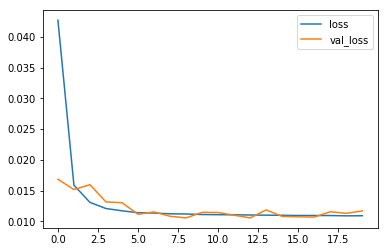

In [48]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [50]:
# 预测
trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

# # invert scaling for forecast
# inv_trainPredict = concatenate((train_x[:,:],trainPredict), axis=1)
# inv_trainPredict = scaler.inverse_transform(inv_trainPredict)
# trainPredict = inv_trainPredict[:,-1]
# # invert scaling for actual
# train_y = train_y.reshape((len(train_y), 1))
# inv_trainY = concatenate((train_x[:,:],train_y), axis=1)
# inv_trainY = scaler.inverse_transform(inv_trainY)
# trainY = inv_trainY[:,-1]
# #invert test
# inv_testPredict = concatenate((test_x[:,:],testPredict), axis=1)
# inv_testPredict = scaler.inverse_transform(inv_testPredict)
# testPredict = inv_testPredict[:,-1]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_testY = concatenate((train_x[:,:],train_y), axis=1)
# inv_testY = scaler.inverse_transform(inv_testY)
# testY = inv_testY[:,-1]

# 反归一化
trainPredict = scaler_train.inverse_transform(trainPredict)
trainY = scaler_train.inverse_transform([train_x])
testPredict = scaler_test.inverse_transform(testPredict)
testY = scaler_test.inverse_transform([test_x])
    
# 计算得分
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# predict_1A_model1 = model.predict(x=test_x,batch_size=100)
# #print(len(predicition))
# pred_keras_model1 = pd.DataFrame({'id':np.arange(1,len(test_x)+1)})
# #pred_keras_model1
# pred_keras_model1['predict_1A_model1'] = predict_1A_model1
# pred_keras_model1.to_csv('../predict/predict_1A_model1.csv',index=False)
# # 4layers :0.22***********************5!
# # 5layers :0.21**********************5!  提高有限

ValueError: non-broadcastable output operand with shape (113142,1) doesn't match the broadcast shape (113142,14)

In [ ]:
plt.plot(test_y,label='real')
plt.plot(testPredict,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 

In [ ]:
mse_test=np.sum((test_y - testPredict)**2)/ len(test_y)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

# dense_model2 with activation

In [ ]:
model2 = Sequential()
model2.add(Dense(units=64, input_shape = (13,),activation='sigmoid',name='layer1'))
model2.add(Dense(units=32, activation='sigmoid',name='layer2'))
model2.add(Dense(units=16,name='layer3',activation='sigmoid'))
model2.add(Dense(units=8,name='layer4',activation='sigmoid'))
model2.add(Dense(units=4,name='layer5',activation='sigmoid'))
model2.add(Dense(units=1,name='layer6'))
model2.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history=model2.fit(x = train_x,y = train_y, validation_data = (eval_x,eval_y), epochs=50, batch_size=1000)
# 4layer tanh 500epoch val_mean_absolute_error:4.7979
# 4layer sigmoid 500epoch val_mean_absolute_error: 1.9355
# 4layer relu  500epoch Val_mean_absolute_error: 4.9140
# 5layer sigmoid 500epoch val_mean_absolute_error: 1.4085
# 6layer sigmoid 1000epoch val_mean_absolute_error: 3.1005 # 增加了层数和epoch 精度并没有提高？？

In [ ]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
predict_1A_model2 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model2 = test_1A
#pred_keras_model1
pred_keras_model2['predict_1A_model2'] = predict_1A_model2
pred_keras_model2.to_csv('../predict/predict_1A_model2.csv',index=False)
# 4layers :0.22***********************5!
# 5layers :0.21**********************5!  提高有限
plt.plot(test_y,label='real')
plt.plot(predict_1A_model2,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 


In [ ]:
mse_test=np.sum((test_y - predict_1A_model2)**2)/ len(test_y_1A)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

# dense_model3 with activation,bias

In [ ]:
model3 = Sequential()
model3.add(Dense(units=64, input_shape = (13,),activation='sigmoid',name='layer1',use_bias = True))
model3.add(Dense(units=32,activation='sigmoid',name='layer2',use_bias = True))
model3.add(Dense(units=16,name='layer3',activation='sigmoid',use_bias = True))
model3.add(Dense(units=8,name='layer4',activation='sigmoid',use_bias = True))
model3.add(Dense(units=1,name='layer5'))
model3.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history=model3.fit(x = train_x,y = train_y, validation_data = (eval_x,eval_y), epochs=50, batch_size=1000)
# val_mean_absolute_error: 1.4931

In [ ]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
predict_1A_model3 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model3 = test_1A
#pred_keras_model1
pred_keras_model3['predict_1A_model3'] = predict_1A_model3
pred_keras_model3.to_csv('../predict/predict_1A_model3.csv',index=False)
# 4layers :0.22***********************5!
# 5layers :0.21**********************5!  提高有限
plt.plot(test_y_1A,label='real')
plt.plot(predict_1A_model3,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 


In [ ]:
mse_test=np.sum((test_y_1A - predict_1A_model3)**2)/ len(test_y_1A)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)